In [1]:
import pandas as pd
import numpy as np
import ast
import collections as c
import matplotlib.pyplot as plt

%matplotlib inline

In [45]:
convs=pd.read_csv('../data/bbAllFullConvosMore.csv',sep=';')

In [46]:
convs.allNames=convs.allNames.apply(lambda x: ast.literal_eval(x))

In [15]:
allUsers=list(set(convs.allNames.sum()))

In [16]:
len(allUsers)

2935

So 2935 unique users participated in our local conversations

In [12]:
before=convs[pd.to_datetime(convs.convoEndTime)<pd.to_datetime('2012-10-27 00:00:00')]

In [13]:
during=convs[(pd.to_datetime(convs.date0)>=pd.to_datetime('2012-10-27 00:00:00')) & (pd.to_datetime(convs.convoEndTime)<=pd.to_datetime('2012-11-04 11:59:59'))]

In [14]:
after=convs[pd.to_datetime(convs.date0)>=pd.to_datetime('2012-11-05 00:00:00')]

In [17]:
bUsers=list(set(before.allNames.sum()))

In [18]:
len(bUsers)

1050

In [19]:
dUsers=list(set(during.allNames.sum()))

In [20]:
len(dUsers)

1660

In [21]:
aUsers=list(set(after.allNames.sum()))

In [22]:
len(aUsers)

1781

In [24]:
len(set(bUsers) & set(dUsers))

558

In [25]:
len(set(dUsers) & set(aUsers))

842

In [26]:
len(set(bUsers) & set(aUsers))

620

In [27]:
len(set(dUsers) & set(aUsers) & set(bUsers))

424

* So more than a half of before users were also active during
* And about a half of during users were active after 
* Over 400 users were active in all three periods

# Patterns by users

### One-person conversations

In [34]:
len(convs[convs.userSetLen==1])/float(len(convs))

0.2574065080135988

Quarter of all conversations are users responding to themselves!!!

In [70]:
np.median(convs.convSize[convs.userSetLen==1])

2.0

In [43]:
np.percentile(convs.convSize[convs.userSetLen==1],90)

2.0

In [39]:
max(convs.convSize[convs.userSetLen==1])

12

In [49]:
convs[(convs.userSetLen==1) & (convs.convSize==12)] # add .values to see as list

,Unnamed: 0,tweet0,date0,username0,text0,tweet1,date1,username1,text1,tweet2,...,text43,branching,convSize,allNames,convoEndTime,convoLen,userSetLen,avgTimePerReply,longTailed,medianReplyTime
84,84,269602947242029056,2012-11-17 00:48:46,anthonyd1972,#whitehouse defense bizarre by the day. #petre...,269603217615233026,2012-11-17 00:49:50,anthonyd1972,@anthonyd1972 so if the CIA talking points wer...,269603536260706304,...,0,True,12,[anthonyd1972],2012-11-17 00:56:09,443,1,40.272727,True,81


So the vast majority of these (90%) are one reply to oneself, but there is a self-conversation of 12 steps (rant about politics)

In [53]:
np.median(convs.convoLen[convs.userSetLen==1])

236.0

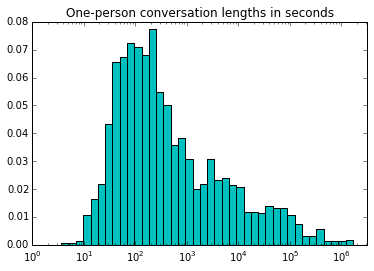

In [68]:
convoLen = convs.convoLen[convs.userSetLen==1].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('One-person conversation lengths in seconds')

In [54]:
np.median(convs.avgTimePerReply[convs.userSetLen==1])

224.5

In [55]:
np.median(convs.medianReplyTime[convs.userSetLen==1])

226.5

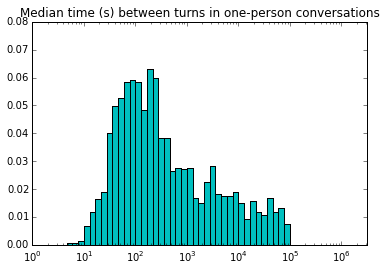

In [69]:
medRepTime=convs[convs.userSetLen==1].medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in one-person conversations')

** Takeway:**
* So the conversations users have with themselves tend to be quite a bit shorter than all the conversations
* While the number of tweet still has median of 2.0 and 90th percentile of 2 as well
* The avg and median gaps between replies in the conversation are much shorter than overall
* Pretty intuitive, since they don't have to wait for another party for a reply - no back and forth

### Two-person conversations

In [56]:
len(convs[convs.userSetLen==2])/float(len(convs))

0.7264044034320868

Almost three quarters of the conversations are with just one other person

In [71]:
np.median(convs.convSize[convs.userSetLen==2])

2.0

In [72]:
np.percentile(convs.convSize[convs.userSetLen==2],90)

4.0

In [73]:
max(convs.convSize[convs.userSetLen==2])

44

In [77]:
convs[(convs.userSetLen==2) & (convs.convSize==44)].values

array([[157, 273878290891157505, '2012-11-28 19:57:27', 'Megglezzz',
        'When boredom strikes I wish I had someone to chat with. #WorkProblema #Only2and1/2HoursToGo',
        273880135822897153, '2012-11-28 20:04:47', 'DDougyy',
        "@Megglezzz Me too. What's up?", 273880423673786368,
        '2012-11-28 20:05:56', 'Megglezzz',
        '@DDougyy skittles, iced tea, music, and work. Yourself?',
        273882120517214208, '2012-11-28 20:12:40', 'DDougyy',
        "@Megglezzz Water and work. And it's 1,000 degrees in here. So I'll be asleep soon lol",
        273882398444384257, '2012-11-28 20:13:46', 'Megglezzz',
        "@DDougyy I feel your pain lol. It's about 900 degrees in here. Was about 1,000 until someone cracked a window.",
        273884185071067136, '2012-11-28 20:20:52', 'DDougyy',
        '@Megglezzz I wish I had a window near me :(', 273885113794842624,
        '2012-11-28 20:24:34', 'Megglezzz',
        '@DDougyy I sit one cubical away from the window. I catch th

* The median suggests that about half of these are still just one tweet and one reply - short exchanges
* The 90th percentile being 4 suggests that bigger proportion of these are longer than in one-person conversations
* The longest convo here is 44 steps - bored work chat and discussion of tv shows, maybe light flirting?
* The 3 out of 4 two-person conversations with 12 tweets are about Sandy in some way: evacuation, prep, infrustricture failure, role of global warming

In [64]:
convs[(convs.userSetLen==2) & (convs.convSize==12)].values

array([[48, 263634418994909185, '2012-10-31 13:31:58', 'pacovell',
        '@JOEDOEchef these are pretty different failures, but we should be designing and building better systems here',
        263714145256480768, '2012-10-31 18:48:46', 'JOEDOEchef',
        '@pacovell not so. Both were water related failures(ie floods) occurring at power stations near bodies of water',
        263716756823080960, '2012-10-31 18:59:09', 'pacovell',
        '@JOEDOEchef Tokyo failure, major earthquake and tsunami took generation offline.  Our generation is OK. Still, improved design would help.',
        263717928594198528, '2012-10-31 19:03:48', 'pacovell',
        "@JOEDOEchef I guess what I'm saying is if Tokyo events happened here it would be FAR worse than in Tokyo - they have better infrastructure",
        263720371415576577, '2012-10-31 19:13:30', 'JOEDOEchef',
        '@pacovell my pt exactly!  This is a joke!  This is not a tsunami !!!  If it was this would be apocalypse!',
        2637199974

In [65]:
np.median(convs.convoLen[convs.userSetLen==2])

990.0

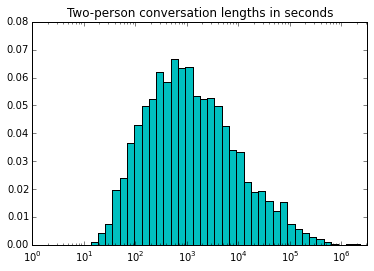

In [74]:
convoLen = convs.convoLen[convs.userSetLen==2].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Two-person conversation lengths in seconds')

In [66]:
np.median(convs.avgTimePerReply[convs.userSetLen==2])

613.0

In [75]:
np.median(convs.medianReplyTime[convs.userSetLen==2])

528.0

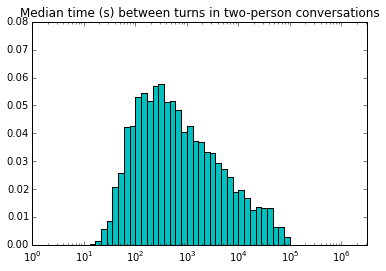

In [76]:
medRepTime=convs[convs.userSetLen==2].medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in two-person conversations')

** Takeway:**
* The two-person conversations are longer than overall (median)
* And much longer than one-person conversations
* The median number of steps is still 2, but 90th percentile is now 4 -  bigger proportion of these are longer than in one-person conversations
* In addition, the breaks between tweets are longer than overall (445s) and definitely one-person conversations
* **Difference between monolog and dialiog/ personal and social**

### More-than-two person conversations

In [78]:
len(convs[convs.userSetLen>2])/float(len(convs))

0.016189088554314394

Only **1.6%** of the conversations are with more than two people

In [79]:
np.median(convs.convSize[convs.userSetLen>2])

4.0

In [80]:
np.percentile(convs.convSize[convs.userSetLen>2],90)

6.1000000000000085

In [81]:
max(convs.convSize[convs.userSetLen>2])

12

In [82]:
convs[(convs.userSetLen>2) & (convs.convSize==12)].values

array([[1988, 272404270014406658, '2012-11-24 18:20:13', 'artiekass',
        '@Jerrod_TheHour why did the article about Norwalk high soccer compare us to Obama and Fairfield to Romney?  Not necessary and a bit racist',
        272413044506767360, '2012-11-24 18:55:05', 'MMAMeg',
        '@artiekass @jerrod_thehour awful reference on so many levels',
        272496307422257152, '2012-11-25 00:25:57', 'Jerrod_TheHour',
        '@artiekass the columns intent was to celebrate the team and its diversity. We have spoken to the team and they understood that.',
        272495921126862851, '2012-11-25 00:24:24', 'Jerrod_TheHour',
        "@artiekass while I could see someone disagreeing with the over the top picture painted in the column I don't see it as racist",
        272497459341709312, '2012-11-25 00:30:31', 'Jerrod_TheHour',
        '@artiekass I for one may have avoided several comparisons but know the author, his intentions , heart , stand behind him for that.',
        27250413797810

* The median length of these conversations is 4 and the 90th percentile is 6
* This suggests that these are, on average, longer conversations than overall than overall and one- and two-person convos
* The longest convo here is 12 steps - discussion of stereotypes in an article about HS football team

In [83]:
np.median(convs.convoLen[convs.userSetLen>2])

1287.0

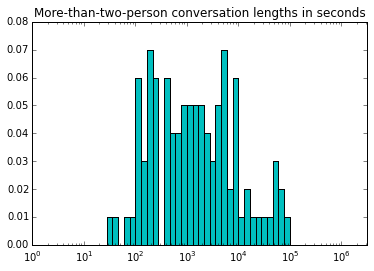

In [86]:
convoLen = convs.convoLen[convs.userSetLen>2].dropna().tolist()
bins=np.logspace(0, int(np.log(max(convoLen))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(convoLen,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('More-than-two-person conversation lengths in seconds')

The number of these conversations is too small for a clear distribution at this resolution (100 bars)

In [87]:
np.median(convs.avgTimePerReply[convs.userSetLen>2])

442.39999999999998

In [88]:
np.median(convs.medianReplyTime[convs.userSetLen>2])

720.25

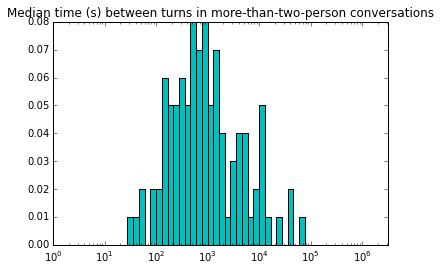

In [89]:
medRepTime=convs[convs.userSetLen>2].medianReplyTime.dropna().tolist()
bins=np.logspace(0, int(np.log(max(medRepTime))), 100)
width=bins[1:]-bins[:-1]
h, b=np.histogram(medRepTime,bins)
h=h/float(sum(h))
plt.bar(b[:-1], h, width, color='c')
#plt.plot(bins[:-1], fit[:-1]*width, linewidth=2)
plt.gca().set_xscale("log")
plt.xlim(xmin=0,xmax=10**6.5)
plt.ylim(ymin=0, ymax=0.08)
plt.title('Median time (s) between turns in more-than-two-person conversations')

** Takeway:**
* The more-than-two-person conversations are longer than overall (median)
* And much longer than one-person and two-person conversations
* The number of tweets in these conversations are higher than overall and others (median=4, 90th=6)
* But the breaks between tweets are the same as overall and slightly longer than two-person (check for sig)
* **As long as it's a dialog/social, more or less the same tempo of conversation is kept**

# Conversation types (# users) across time stages

In [90]:
len(before)/float(len(convs))

0.1960498623927473

In [91]:
len(during)/float(len(convs))

0.3118018455560952

In [92]:
len(after)/float(len(convs))

0.4659219685931682